# Diffusion and Contagion

In [1]:
%%capture
# Housekeeping
import networkx as nx
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl

# Make sure you download econ46_library.py from our course material and save it in the same folder as then notebooks
# this file has some functions specifically coded for the class
from supporting_material import econ46_library as el

# These modules are only to have some interactive pieces of code in the notebooks
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display



The following example looks at contagion in a random network with a particular structure. Nodes have been aribtrarily divided into groups in which the probability of links vary within and across groups.

This structure leads to the formation of clusters and provides an interesting setting for studying contagion. Nevertheless the **contagion** function in econ46_library.py is more general and you are encouraged to use it in other networks. 

In [2]:
# Generate some network
G1 = nx.stochastic_block_model(sizes=[4, 4, 4,8,4], p=[[.8,.01,.01,0.03,.02],
                                                  [.01,.7,.01,0.02,.01],
                                                  [0.01,.01,.6,.01,.01],
                                                  [0.03,.02,.01,.9,.01],
                                                  [0.02,.01,0.01,0.01,.89]],seed=987786)



In [3]:
# Set list of infected nodes on period 0
initial = [21, 14]

We have "seeded" the network in two injection points and now we shall see how the process spreads when the probability of contagion is equal to one. That is, if any of a node's connection is infected, they shall be infected themselves in the subsequent period.|

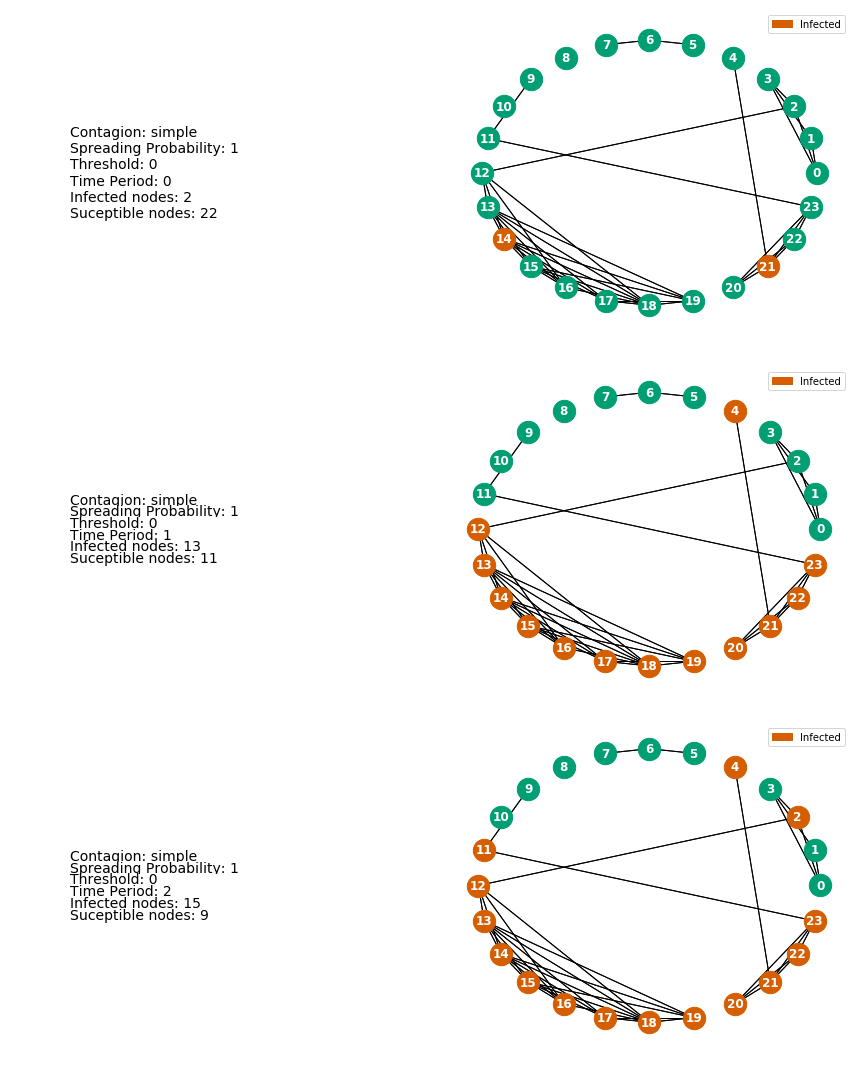

In [4]:
el.contagion(G1,initial,T=3)

You can easily change this probability of contagion in the arguments of the function. Note that you can also change the time horizon of interes.

**How large does T need to be for the contagion process to reach the maximum amount of nodes?**

**How does your question change when the probability of contagion changes?**

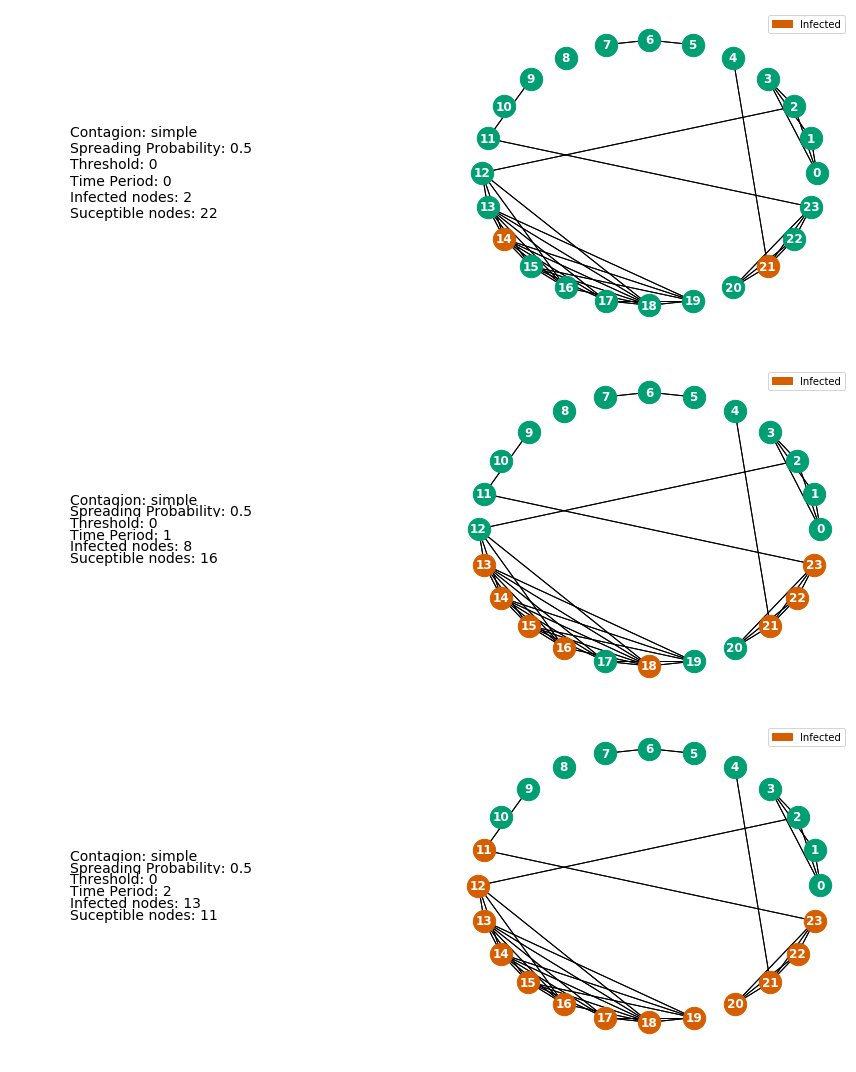

In [5]:
el.contagion(G1,initial,T=3,p=.5)

A different diffusion process requires that at least a certain share (or number) of a node's connections are infected for them to aquire infected quality. These processes are usually referred to as **threshold** models.

Our contagion function also allows for you to model the process that way:

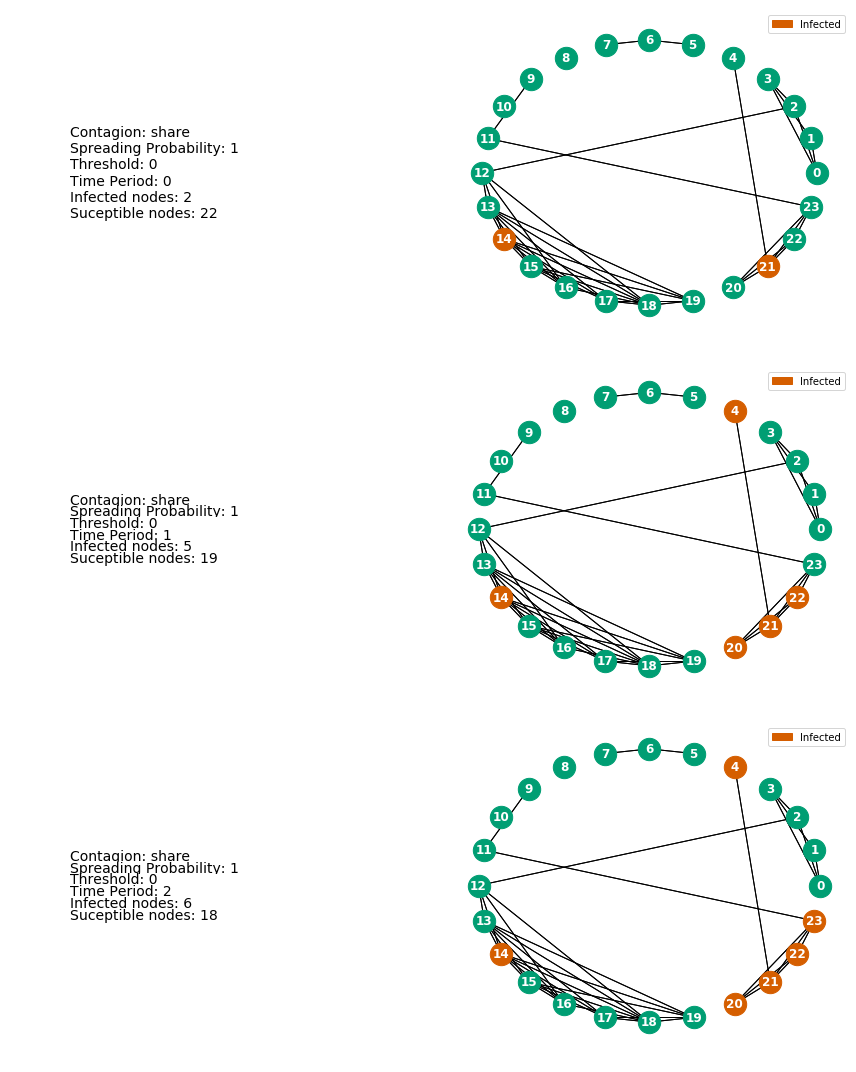

In [6]:
el.contagion(G1,initial,T=3,spreading='share',share=.3)


**What happenes when the requirement is a number of connections and not share? Try different injection points (initial states).** 

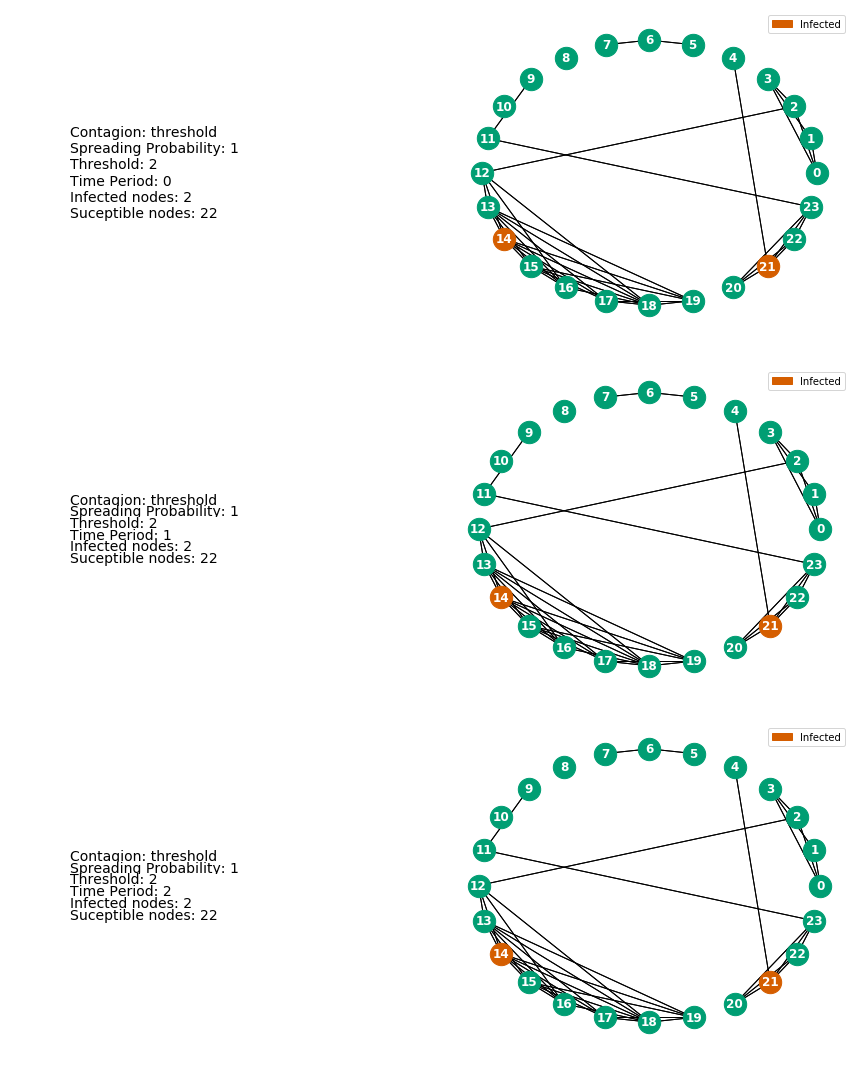

In [7]:
el.contagion(G1,initial,T=3,spreading='threshold',threshold=2)

When thinking about the spread of diseases, we can also consider the posibility of some nodes not being succeptible to the infection or not being contagious after getting infected. This could happen naturally or could be caused by a policy such as a vaccination campaign.

We can model this behavior in our function by specifying a vaccinated list of nodes:

**Compare different vaccination policies?** 

Vaccines are not free and sometimes it is not possible to vaccinate everyone.  **If you could only vaccinate two people in the network, how would you choose them depending on the diffusion process that you face?**

**How does your answer change if you do not know which node will be infected in the initial state? Is there a way to vaccinate to prevent for the worst case scenario?**  

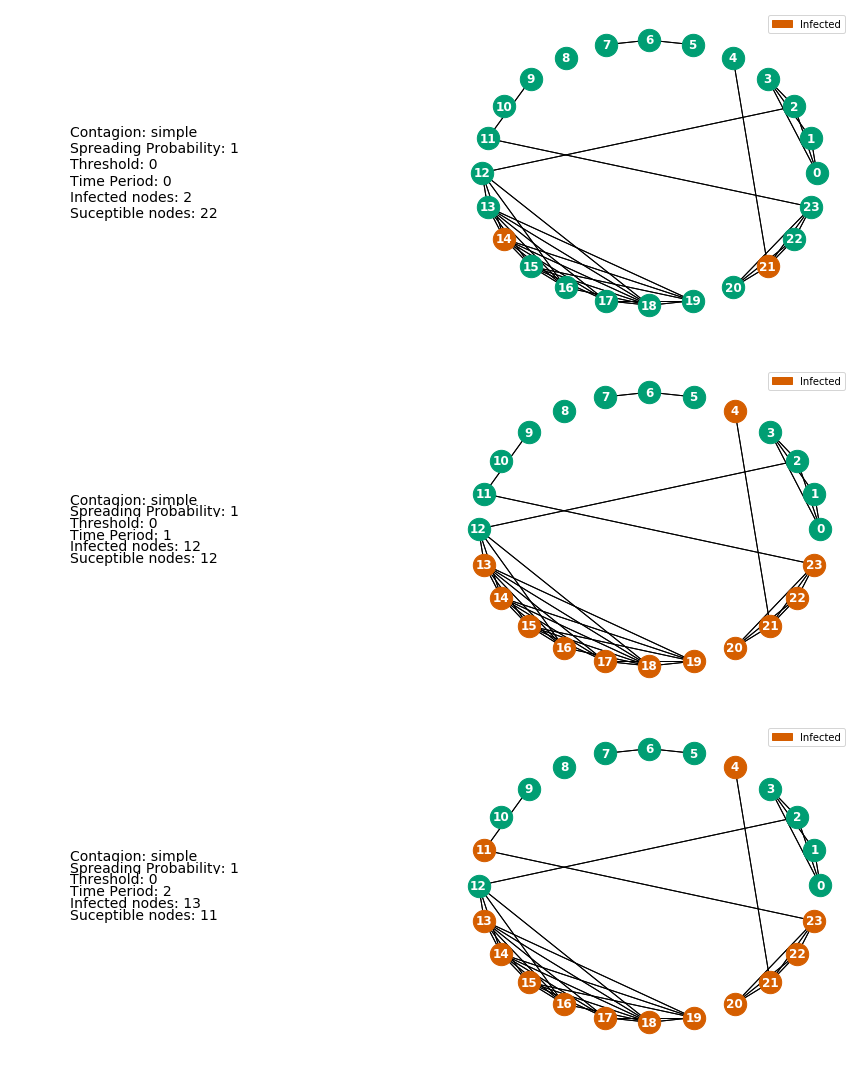

In [8]:
# list of vaccinated nodes
vaccinated=[12]

el.contagion(G1,initial,T=3,vaccinated=vaccinated)

### Real world flu: random sickness or network contagion?

Below you can see data from a real-life network. Nodes are colored to reflect the presence of flu symptoms during 14 weeks.

If instead of the actual flu status, we randomly reassign the "sick" label in the network (e.g. in the first week we asign 3 nodes to be sick and the rest to be non-sick) and count how many sick people have sick connections, then we can get an idea of how likely is flu to appear among connected nodes only by chance.

We learn how likely this happens by chance by simulating that random allocation many times. This simulation yields the distribution on the right panels below.

Finally, if we look at how many sick people have sick connections in the real data (the red dashed line in the panel) then we can test whether the flu seems like it appears randomly and independently in the network or if the presence of symptoms is correlated in the network. The smaller the value in the vertical axis at which the dashed line crosses the solid line, the less likely is our  model "flu-happens-randomly-and-independently".

For this dataset, it seems like the correlation in the network is high for some weeks and low for others.


Uncomment code below and run the simulation

Running simulation . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

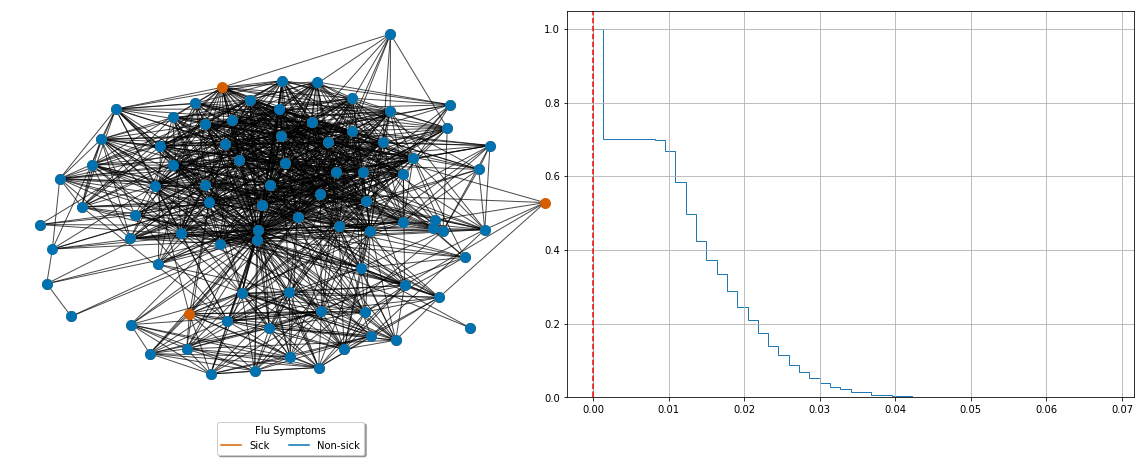

2009-01-12/2009-01-18


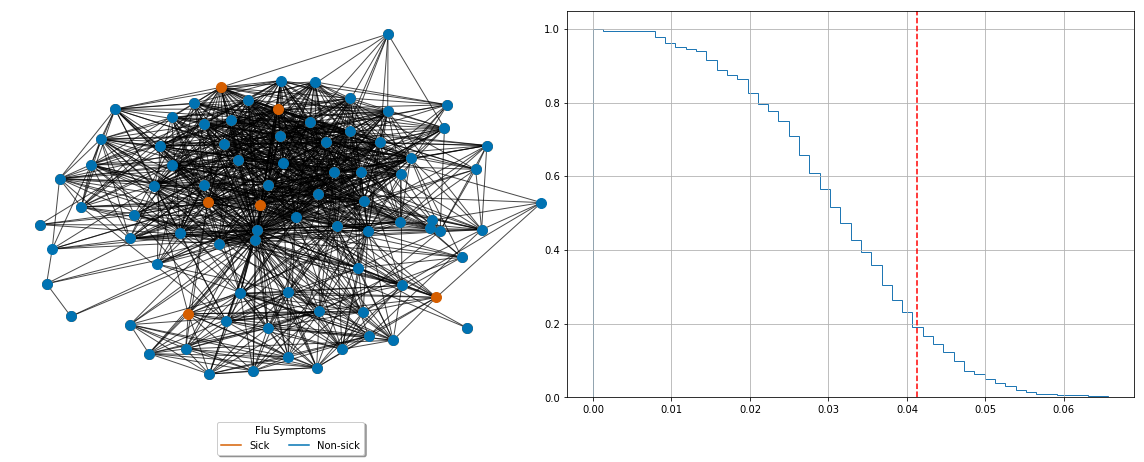

2009-01-19/2009-01-25


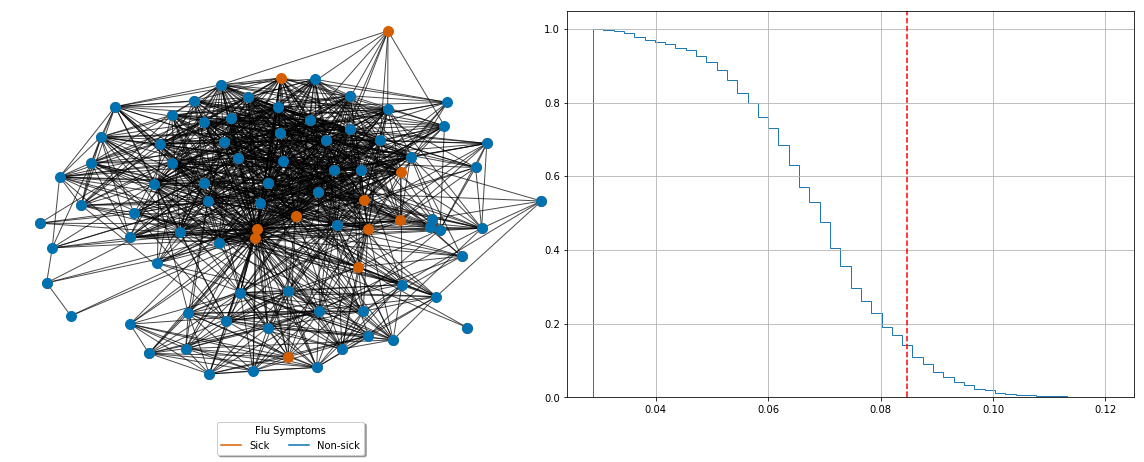

2009-01-26/2009-02-01


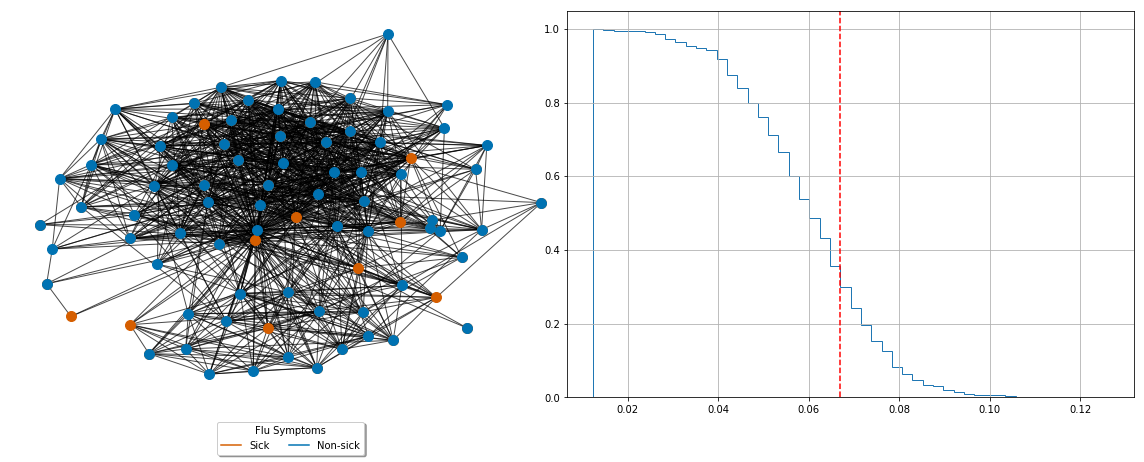

2009-02-02/2009-02-08


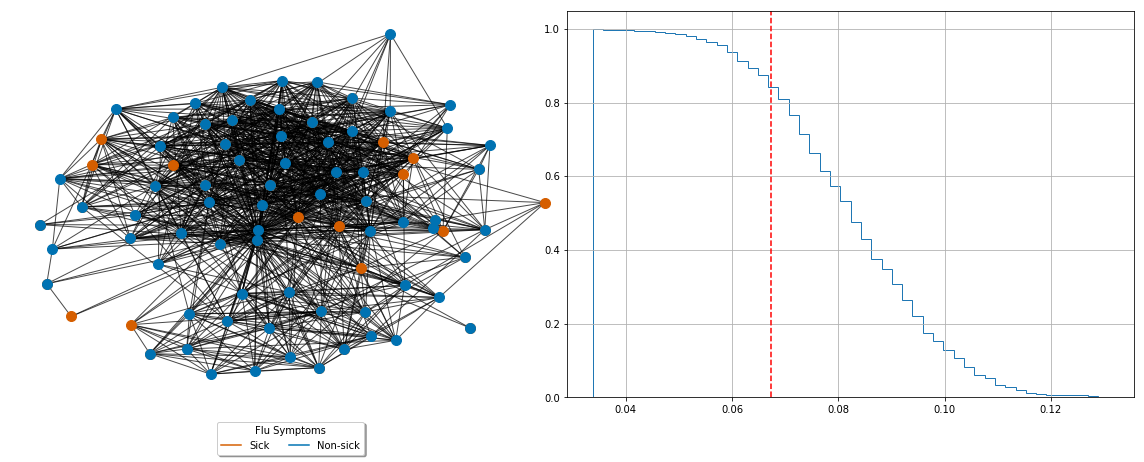

2009-02-09/2009-02-15


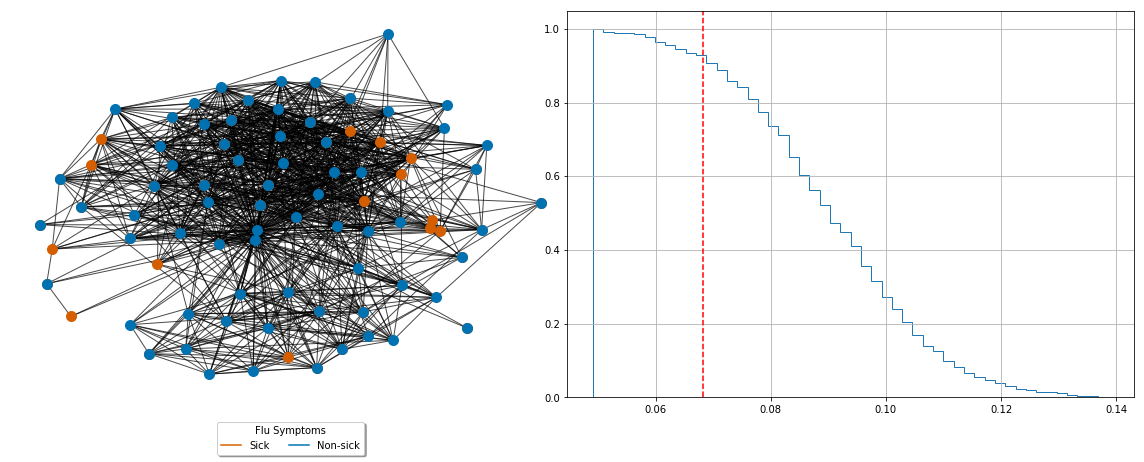

2009-02-16/2009-02-22


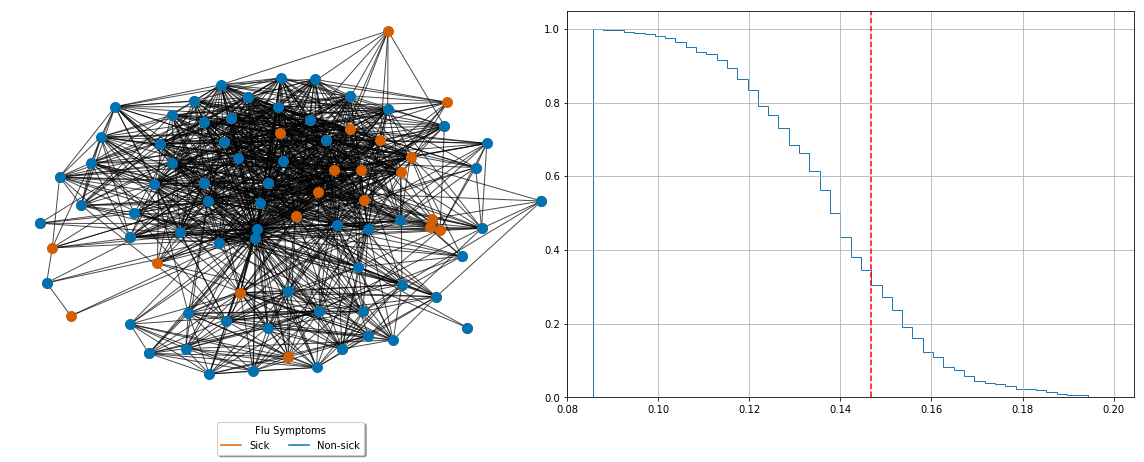

2009-02-23/2009-03-01


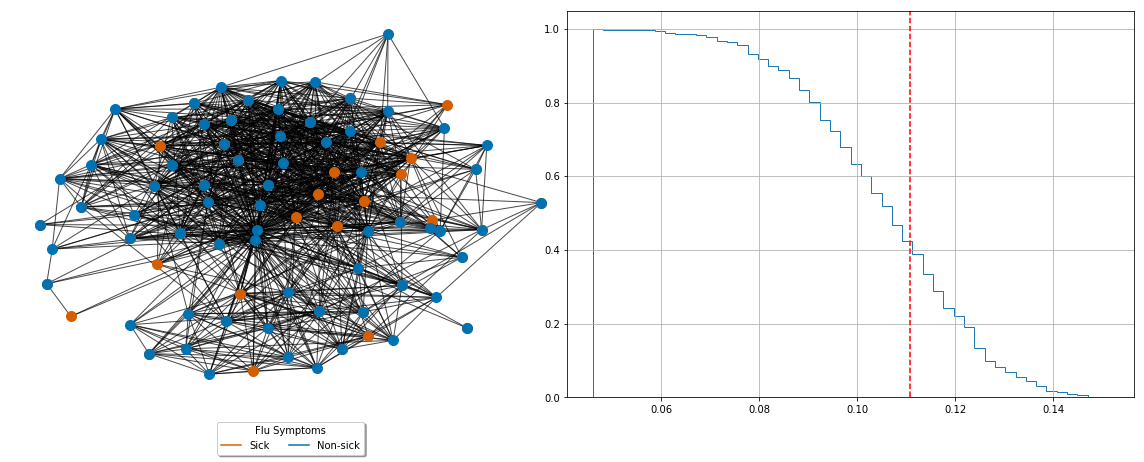

2009-03-02/2009-03-08


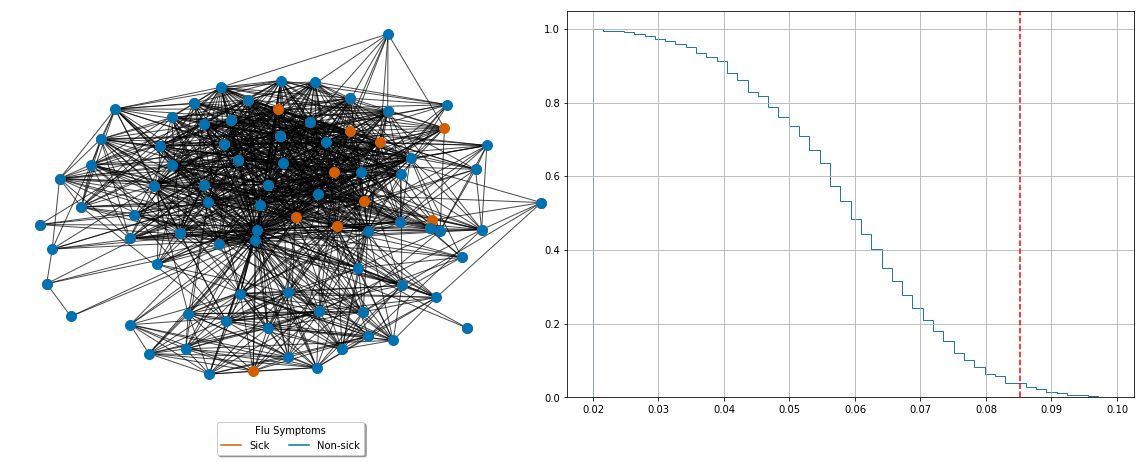

2009-03-09/2009-03-15


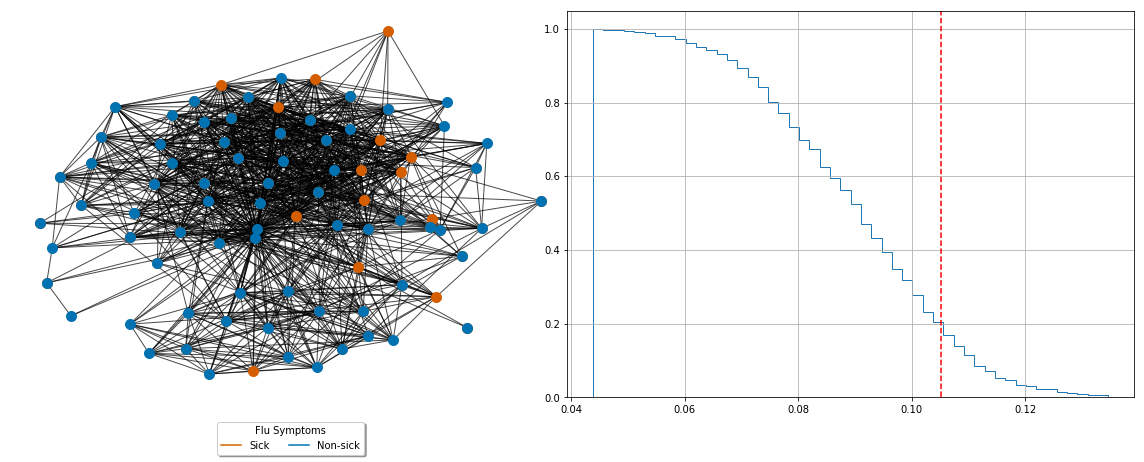

2009-03-16/2009-03-22


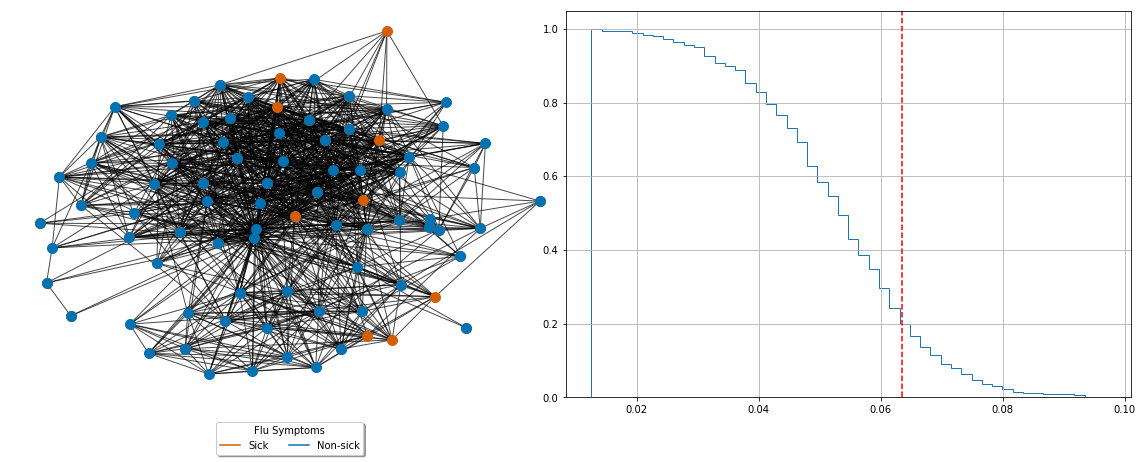

2009-03-23/2009-03-29


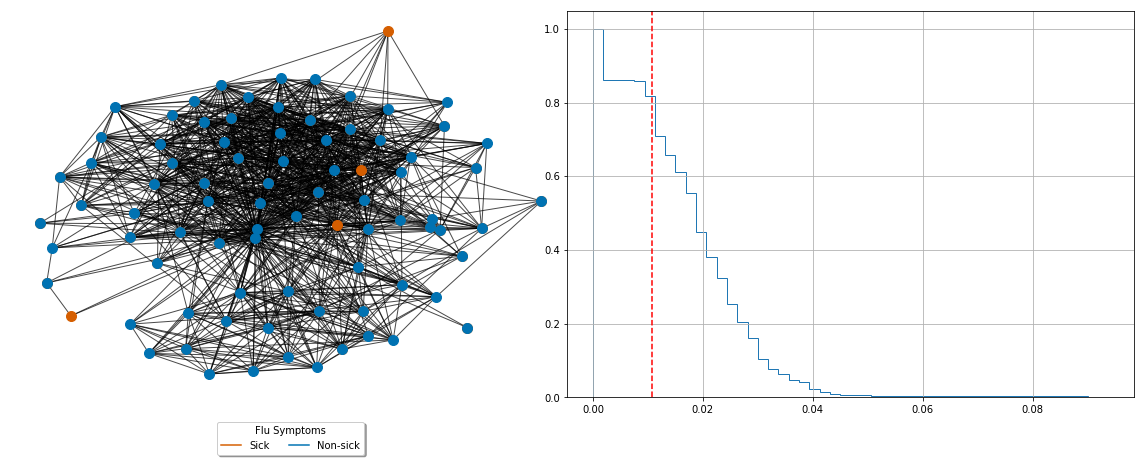

2009-03-30/2009-04-05


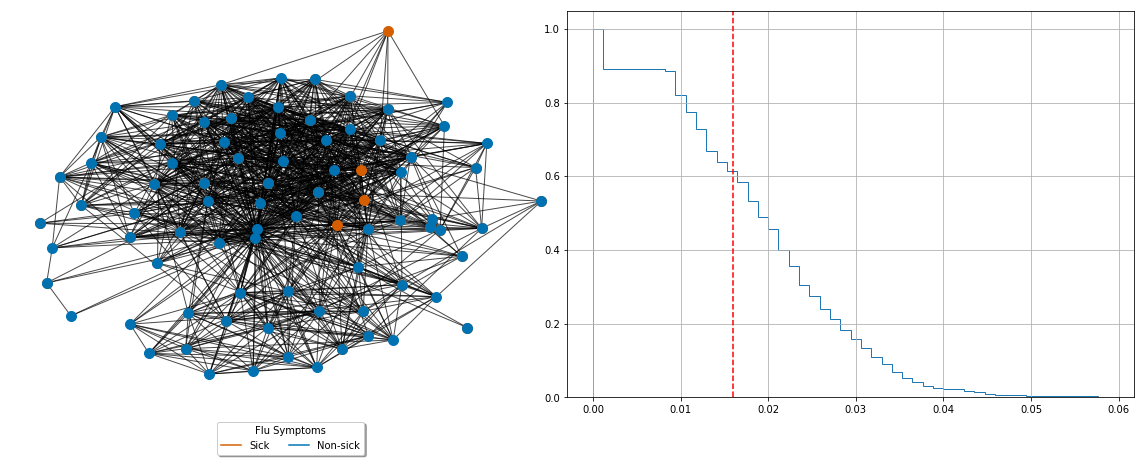

2009-04-06/2009-04-12


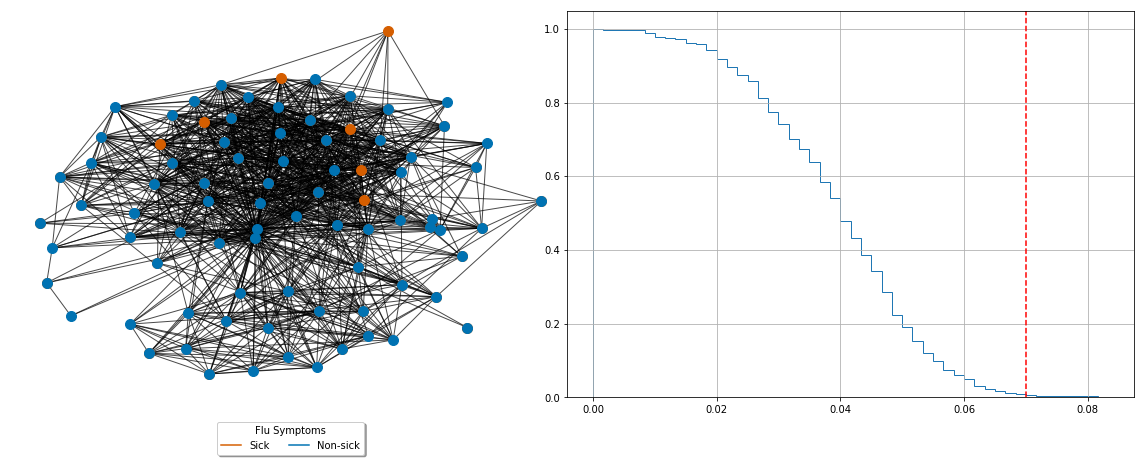

In [9]:
#el.real_flu_contagion_with_pval()